DEWA BAGUS PUTU ARYA DHANANJAYA (10122362)

#SOAL
#Instruksi Tugas Praktikum FIKTI dan FTI
1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)
2. Jelaskan apakah terdapat korelasi antara variabel atau fitur compactness_mean dengan concavity_mean
3. Buatlah diagram korelasi dari fitur compactness_mean dengan concavity_mean
4. Hitung nilai covariance dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.
5. Hitung nilai pearson correlation dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.
6. Lakukan uji hipotesis untuk kolom fitur compactness_mean dengan concavity_mean yang berbeda serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan.

1)Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
# read data as pandas data frame
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/data.csv"
data = pd.read_csv(url_data)
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [3]:
## Melihat 5 baris awal dari dataset yang digunakan
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2) Jelaskan apakah terdapat korelasi antara variabel atau fitur compactness_mean dengan concavity_mean

In [4]:
datacorr1 = pd.DataFrame({"compactness_mean":data["compactness_mean"],"concavity_mean":data["concavity_mean"]})

In [5]:
datacorr1.corr()

,compactness_mean,concavity_mean
compactness_mean,1.000000,0.883121
concavity_mean,0.883121,1.000000


#Penjelasan
diagram korelasi antara variabel compactness_mean dengan concavity_mean menunjukan bahwa keduda diagram korelasi nya positif satu sama lain

3) Buatlah diagram korelasi dari fitur compactness_mean dengan concavity_mean

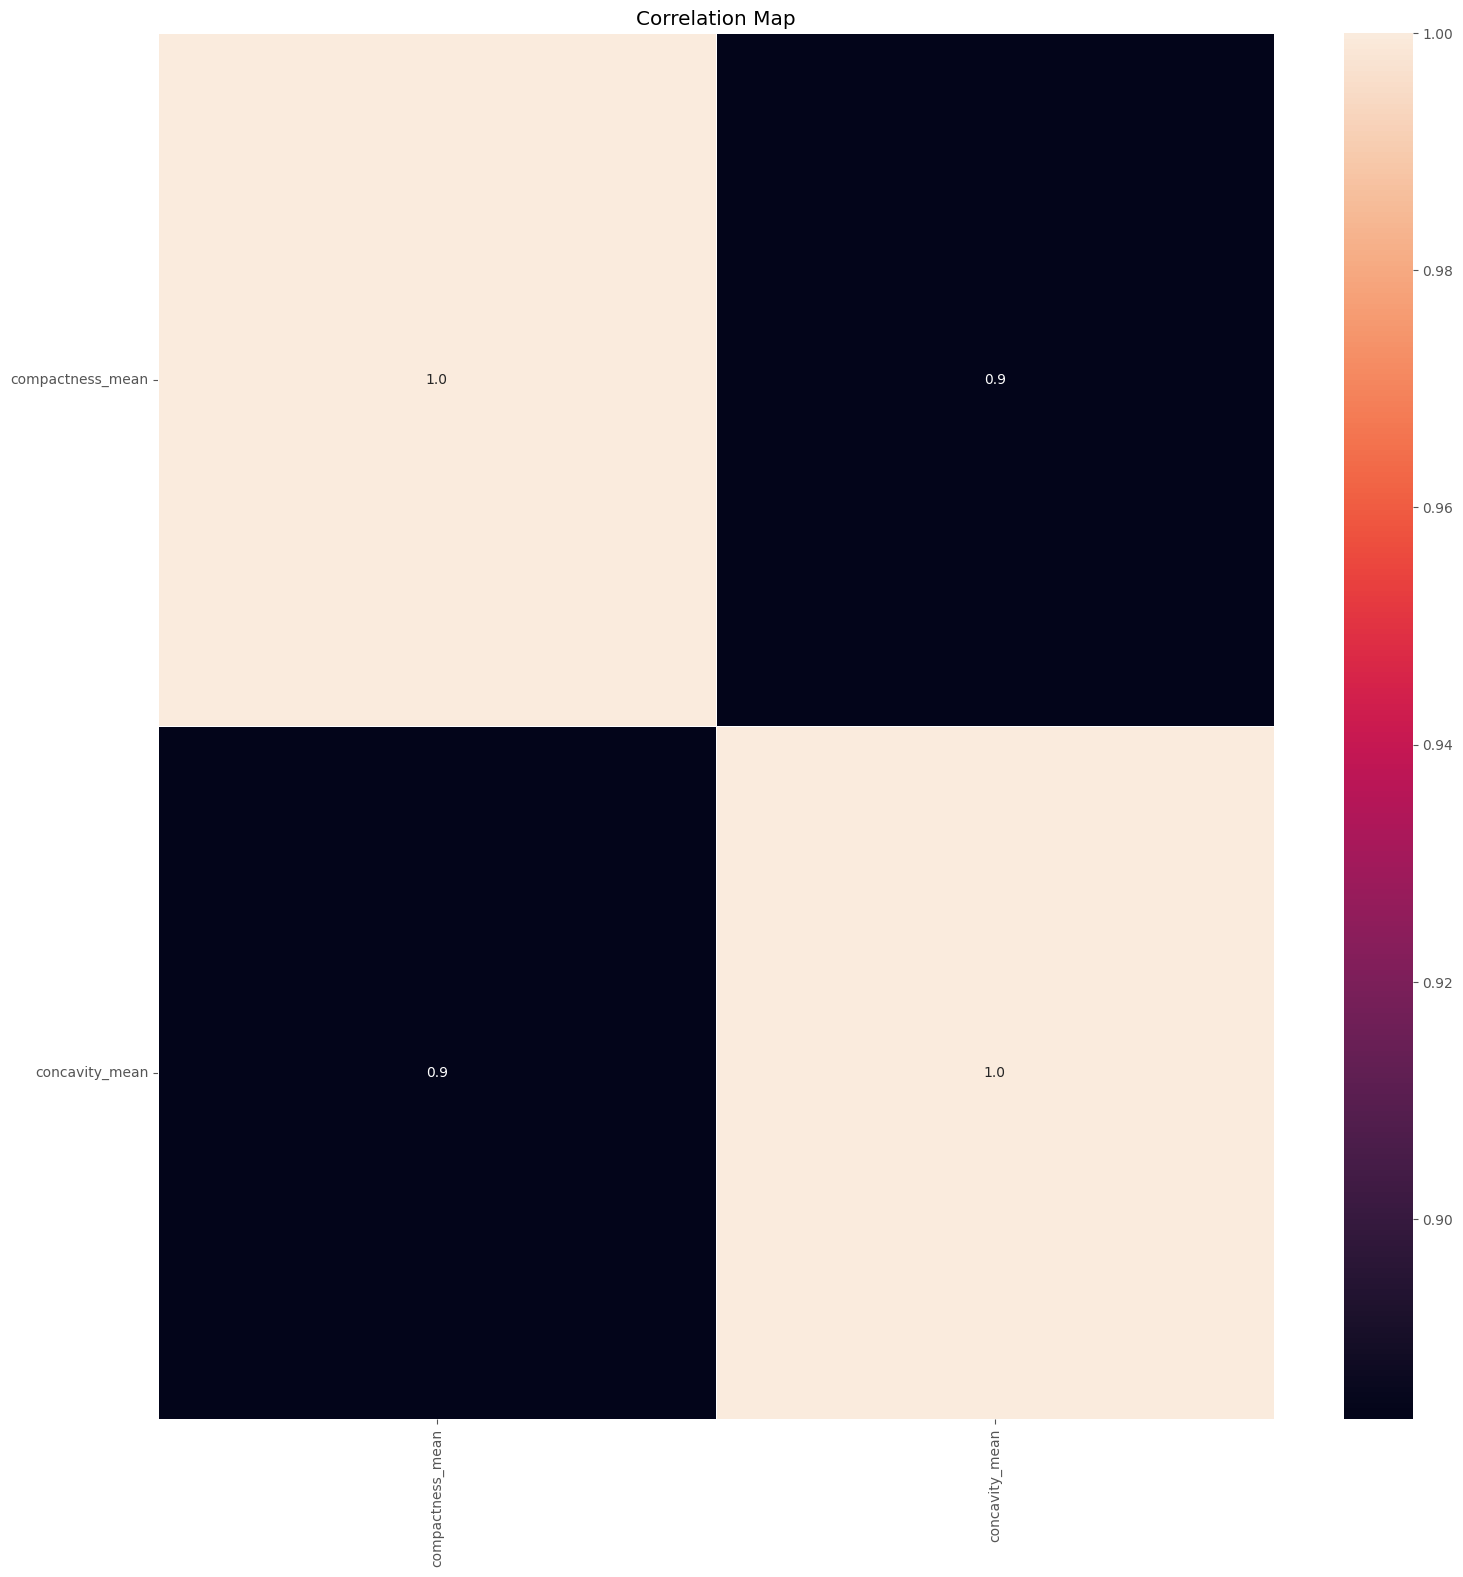

In [6]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(datacorr1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

<Figure size 2500x2000 with 0 Axes>

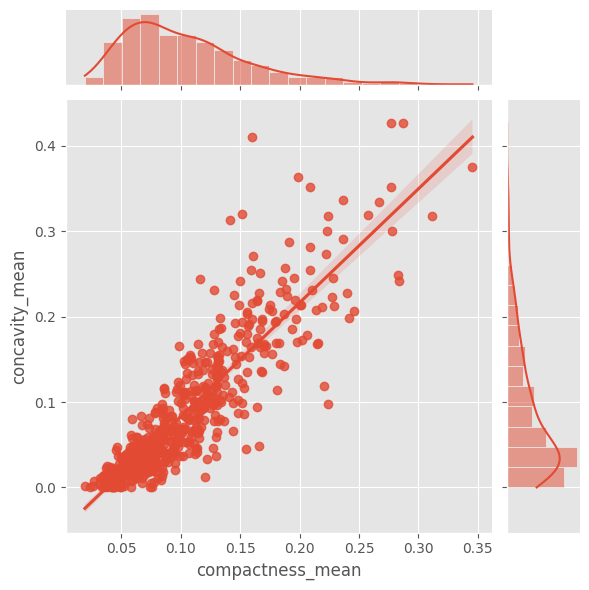

In [7]:
plt.figure(figsize = (25,20))
sns.jointplot(data=data, x="compactness_mean", y="concavity_mean", kind="reg")
plt.show()

#Penjelasan
terdapat grafik yang menggambarkan sebuah diagram korelasi yang berupa grafik dan blok lalu nanti angka tersebut akan terhitung di nomor berikutnya ini merupakan tampilan visual dari grafik diagram korelasi

4) Hitung nilai covariance dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.

In [8]:
np.cov(data.compactness_mean,data.concavity_mean)
print("Covariance diantara compactness mean  dan concavity mean: ",data.compactness_mean.cov(data.concavity_mean))

Covariance diantara compactness mean  dan concavity mean:  0.003718134921780181


#Penjelasan
Covariance tidak 0 berarti dua kolom ini bukan ortogonal dan tidak negtif berarti menunjuk ke arah yang sama

5) Hitung nilai pearson correlation dari fitur compactness_mean dengan concavity_mean. Jelaskan arti dari nilai tersebut.

In [9]:
p1 = data.loc[:,["compactness_mean","concavity_mean"]].corr(method= "pearson")
p2 = data.compactness_mean.cov(data.concavity_mean)/(data.compactness_mean.std()*data.concavity_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  compactness_mean  concavity_mean
compactness_mean          1.000000        0.883121
concavity_mean            0.883121        1.000000
Pearson correlation:  0.883120670177251


#Penjelasan
pearson korelasi antara compactness dan concavity berkorelasi positif dikarenakan nilai korelasinya 0.88 angka yang dapat menunjukan korelasi yang positif

6) Lakukan uji hipotesis untuk kolom fitur compactness_mean dengan concavity_mean yang berbeda serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan.

In [10]:
statistic, p_value = stats.ttest_rel(data.compactness_mean,data.concavity_mean)
print('p-value adalah: ',p_value)

p-value adalah:  4.29231315918515e-18


#Penjelasan
p-value rendah, makadari itu pengaruh tersebut dikatakan signifikan secara statistik yang artinya tidak mungkin secara kebetulan. nilai mendekati 0 berarti kedua data ini sangat berpengaruh dan dapat hipotesis menjadi 0
